In [26]:
import sys
sys.path.append("../")
import library
import matplotlib.pyplot as plt
import math
import tqdm
%matplotlib inline

### Question 1 

In [2]:
def func(x):
    return math.sqrt(1+1/x)

In [3]:
runs =[10,20,30]
Lower_bound = 1
Upper_bound = 4
print("N     ||     Midpoint     ||    Trapezoidal   ||     Simpson      ||")
print("-"*70,end="")
print()
for run_ in runs:
    print(run_, end="    ||    ")
    print(format(library.integrate(func, run_, Lower_bound, Upper_bound, mode = "midpoint"),"0.8f"),end="    ||    ")
    print(format(library.integrate(func, run_, Lower_bound, Upper_bound, mode = "trapezoidal"),"0.8f"),end="    ||    ")
    print(format(library.integrate(func, run_, Lower_bound, Upper_bound, mode = "simpson"),"0.8f"),end="    ||    ")
    print()
    print("-"*70,end="")
    print()

N     ||     Midpoint     ||    Trapezoidal   ||     Simpson      ||
----------------------------------------------------------------------
10    ||    3.61897889    ||    3.62260838    ||    3.62024817    ||    
----------------------------------------------------------------------
20    ||    3.61988003    ||    3.62079364    ||    3.62018872    ||    
----------------------------------------------------------------------
30    ||    3.62004881    ||    3.62045539    ||    3.62018518    ||    
----------------------------------------------------------------------


### Question 2 

In [4]:
def func(x):
    return math.sin(x)**2

In [7]:
ans = []
unct = []
x = []
Lower_bound = -1
Upper_bound = 1
limit = (Lower_bound,Upper_bound)
for i in tqdm.tqdm(range(10,100000,100)):
    x.append(i)
    a,b = library.integration.monte_carlo_integration(i,limit,func)
    ans.append(a)
    unct.append(b)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:15<00:00, 13.24it/s]


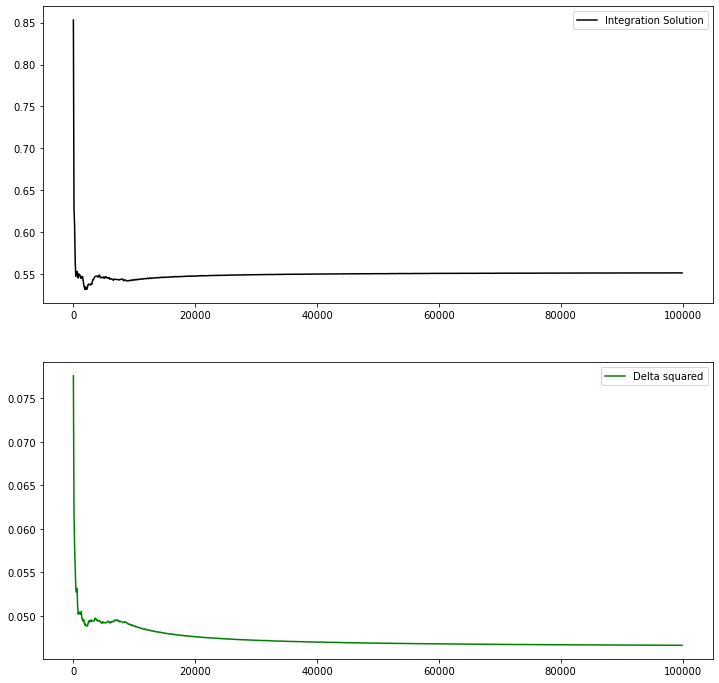

In [49]:
fig,axs = plt.subplots(2,1, figsize= (12,12))
axs[0].plot(x,ans, label = "Integration Solution", c = "black")
axs[1].plot(x,unct, label = "Delta squared" ,c = "green")
axs[0].legend()
axs[1].legend()
plt.show()

In [50]:
def best(x):
    for i in range(len(x)):
        if x[i]==min(x):
            return i
# Now we have estmiated the solution for a bunch of different iteration values
print(f"The integration value for the max iteration({x[-1]} iterations)", ans[-1])
print(f"The mean integration value", sum(ans)/len(x))
print(f"The integration value with the lowest delta^2 ({min(unct)}) value", ans[best(unct)])

The integration value for the max iteration(99910 iterations) 0.5517878096728243
The mean integration value 0.5502276682431023
The integration value with the lowest delta^2 (0.04660994520065269) value 0.551801203140656


### Question 3

In [55]:
# If we have a beam of mass density lambda, and length of 2m 
# Then mass of the beam is
def mass_density(x):
    return x**2
def integrand2(x):
    return mass_density(x)*x
Lower_bound = 0
Upper_bound = 2
m = library.integrate(mass_density, 10, Lower_bound,Upper_bound, mode = "midpoint")
x_cm = library.integrate(integrand2, 10, Lower_bound,Upper_bound, mode = "midpoint")/m

In [56]:
x_cm

1.4962406015037595